In [185]:
import skimage
import cv2
import pandas as pd
import numpy as np
from scipy import ndimage as ndi
import os
import matplotlib.pyplot as plt
import sys,re
import cv2 as cv
import blur_detector

['AA03_s1_w1.png', 'AA03_s1_w2.png', 'AA03_s1_w3.png', 'AA03_s1_w4.png', 'AA03_s1_w5.png', 'AA03_s1_w6.png']


(1080, 1080)

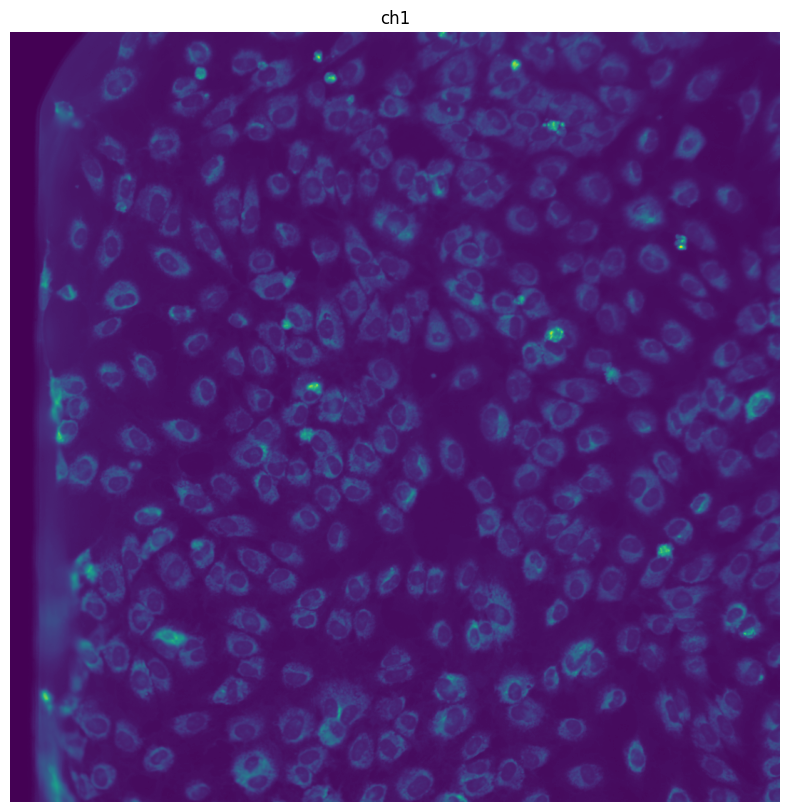

In [191]:
data_dir = '/mnt/synology01/Recursion/rxrx2/images/HUVEC-1/Plate1/'
files = sorted([f for f in os.listdir(data_dir) if re.search('AA03_s1',f) is not None])
# data_dir = '/mnt/synology01/HTN0001/HTN0001_CCU384_401__2024-02-17T22_04_34-Measurement 19/max_proj'
# files = sorted([f for f in os.listdir(data_dir) if re.search('r04c06f04',f) is not None])
print(files)
img_dict = {}
for i in range(len(files)):
    ch_img = cv.imread(os.path.join(data_dir,files[i]),cv.IMREAD_UNCHANGED)
    ch_img = cv.resize(ch_img,(1080,1080),cv.INTER_AREA)
    # for j in range(1):
    #     ch_img = cv.GaussianBlur(ch_img, (31,31), 0)
    img_dict.update({f'ch{i}':ch_img})
plt.figure(figsize=(10,10))
plt.imshow((img_dict['ch1']-img_dict['ch1'].min())/(img_dict['ch1']-img_dict['ch1'].min()).max())
plt.axis('off')
plt.title('ch1')
ch_img.shape

In [214]:
# increasingly blur the nuclei channel
test_ch = img_dict['ch0']
print(img_dict.keys())
# test_ch[test_ch>np.percentile(test_ch,99)] = np.percentile(test_ch,99)
blur_stack = np.zeros((10,test_ch.shape[0],test_ch.shape[1])).astype(float)
kernels = np.arange(3,103,10)
print(kernels)
for i in range(10):
    blur_ch= test_ch.astype(float)
    # for j in range(i*100):
    blur_ch[blur_ch>np.percentile(blur_ch,99.9)] = np.percentile(blur_ch,99.9)
    blur_ch = cv.GaussianBlur(test_ch, (kernels[i],kernels[i]), 0)
    
    blur_stack[i] = blur_ch
    # blur = 1-cv2.Laplacian((blur_ch-blur_ch.min())/(blur_ch-blur_ch.min()).max(), cv2.CV_64F,ksize=5)
blur_stack = np.concatenate([test_ch.reshape(1,1080,1080),blur_stack],axis=0)


dict_keys(['ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5'])
[ 3 13 23 33 43 53 63 73 83 93]


298


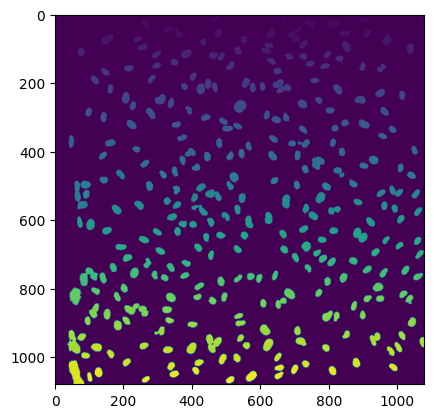

In [215]:
import skimage.measure
from skimage.morphology import remove_small_objects

otsu = skimage.filters.threshold_otsu(blur_stack[0])
binary = blur_stack[0] > otsu
binary = remove_small_objects(binary,min_size=300)
label= skimage.measure.label(binary)
n_cells = len(np.unique(label))-1
print(n_cells)
plt.imshow(label)

59111.62743346714
48472.26721595407
15858.828383006019
7460.391897280365
4744.975875106442
4500.154402131494
5343.527664780289
7224.77446377443
10960.503142202602
12829.579247236765


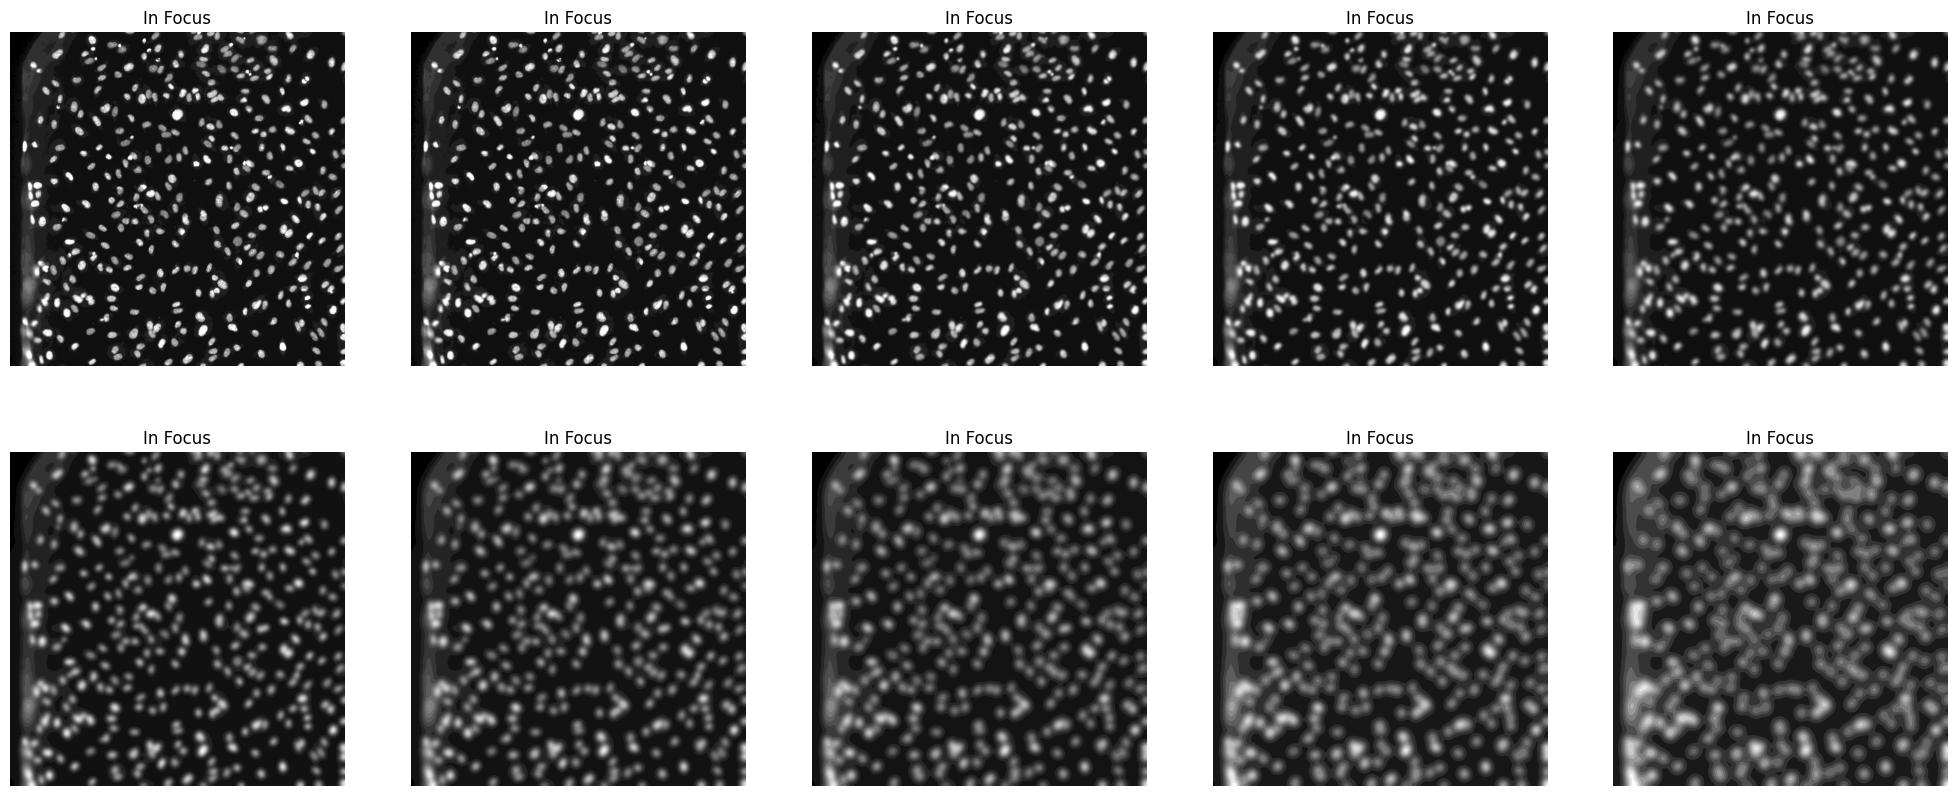

In [216]:
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(25,10))
for i,ax in enumerate(axes.flat):
    
    img = blur_stack[i]
    # img = cv.resize(img,(1080,1080))(
    blur = 1-cv2.Laplacian((img-img.min())/(img-img.min()).max(), cv2.CV_64F,ksize=9)*np.exp(-1/n_cells)
    print(blur.var())
    ax.imshow(img,cmap='gray')
    ax.axis('off')
    if blur.var()>4000:
        ax.set_title('In Focus')
    else:
        ax.set_title('Out of Focus')
# fig.tight_layout(pad=.5)

In [99]:
# fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(25,10))
for i,ax in enumerate(axes.flat):
    img = blur_stack[i]
    # img = cv.resize
    blur = 1-cv2.Laplacian((img-img.min())/(img-img.min()).max(), cv2.CV_64F,ksize=9)
    # blur2 = blur_detector.detectBlur(((img-img.min())/(img-img.min()+np.finfo(float).eps)*255).astype(np.uint8),downsampling_factor=1,num_scales=4,scale_start=2,num_iterations_RF_filter=3)
    print(blur.var())
    # ax.imshow(blur2,cmap='gray')
    # ax.axis('off')
    # print(blur2)
    # print(blur.var())
# fig.tight_layout(pad=.3)
# for i,ax in enumerate(axes.flat):
#     ax.imshow(blur_stack[i,540:,:540],cmap='gray')
#     ax.axis('off')


59509.68403149341
48798.67856046188
15965.621437924478
8563.077920471924
6248.91321573646
6036.867126523118
8719.497709084251
12288.713962675665
13349.963442962784
15930.312036756091


0.13180246737308843

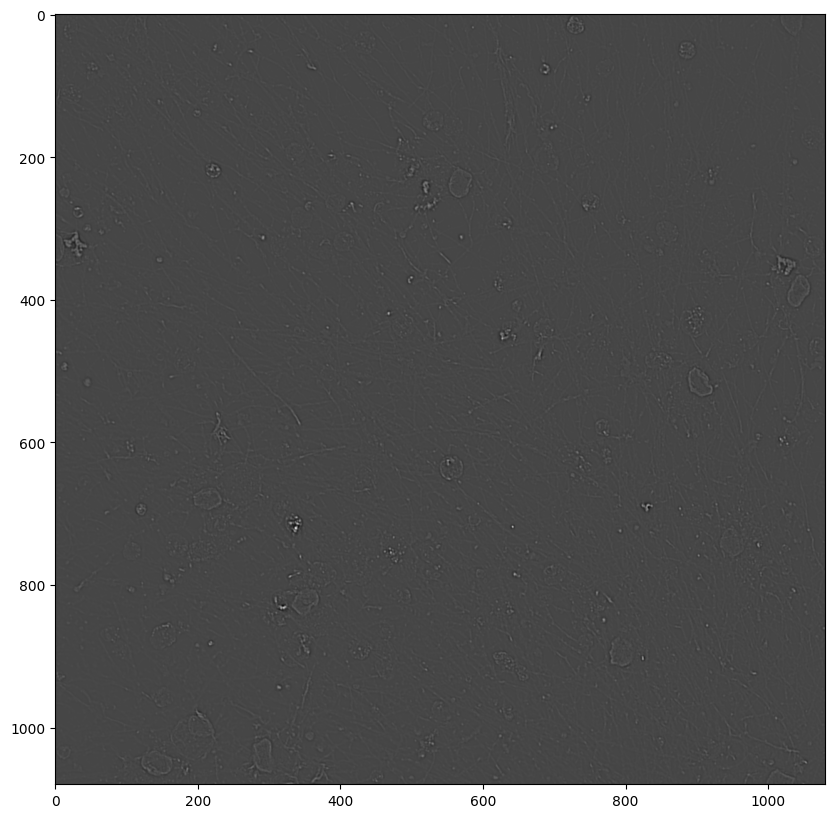

In [7]:
channels = list(img_dict.keys())
for i, ch in enumerate(channels):
    ch_img = img_dict[ch]
    h,w = ch_img.shape
    blur = 1-cv2.Laplacian((ch_img-ch_img.min())/(ch_img-ch_img.min()).max(), cv2.CV_64F,ksize=5)

plt.figure(figsize=(10,10))
plt.imshow(blur,cmap='gray')
blur.var()

0.9672328019570996